## Observations and Insights 
1.) According to the tumor volume line graph, Capomulin seems to take up to 10 days for the tumor volume to decrease significantly.

2.) According to the scatter polt, the more a mouse weighs the tumor volume increases.

3.) According to the box plot, Capomulin & Cetfamin resulted in the low final tumor volume while Ramicane & Infubinol had high tumor volumes. This means that Capomulin & Cetfamin is the most effective with lowering tumor volumes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_Me = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combine_Me

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combine_Me["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combine_Me[combine_Me.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dups_rows = combine_Me[combine_Me.duplicated(['Mouse ID',])]
all_dups_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_DataFrame = combine_Me.drop_duplicates("Mouse ID")
clean_DataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean = combine_Me.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combine_Me.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combine_Me.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combine_Me.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combine_Me.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_DataFrame = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_DataFrame

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

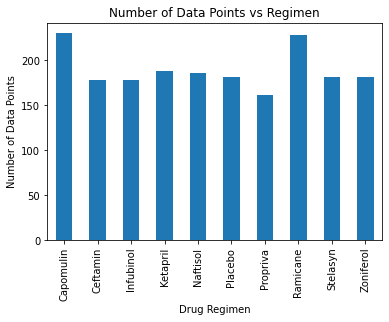

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barpd_Pandas = combine_Me.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_Pandas = barpd_Pandas.plot.bar(rot='vertical',title='Number of Data Points vs Regimen')

bar_plot_Pandas.set_xlabel("Drug Regimen")
bar_plot_Pandas.set_ylabel("Number of Data Points")

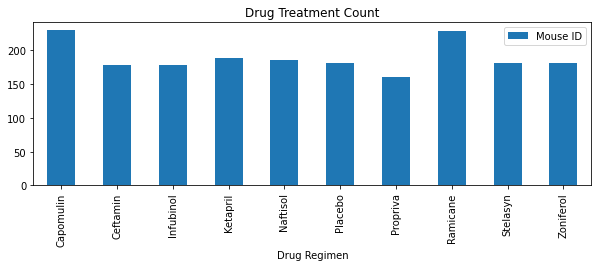

<Figure size 432x288 with 0 Axes>

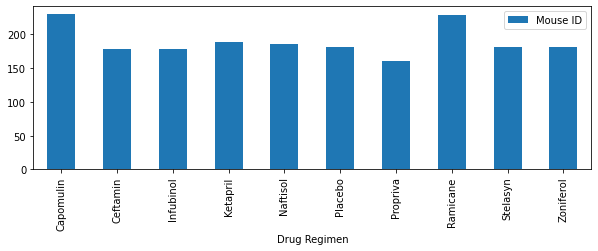

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_data_1 = pd.DataFrame(combine_Me.groupby(["Drug Regimen"]).count()).reset_index()
#Just get the columns we need
drugs_DataFrame = drug_data_1[["Drug Regimen", "Mouse ID"]]
#set the index to column
drugs_DataFrame = drugs_DataFrame.set_index("Drug Regimen")
drugs_DataFrame.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()
drugs_DataFrame.plot(kind="bar", figsize=(10,3))


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_DataFrame = pd.DataFrame(combine_Me.groupby(["Sex"]).count()).reset_index()
gender_DataFrame.head()

gender_DataFrame = gender_DataFrame[["Sex","Mouse ID"]]
gender_DataFrame.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

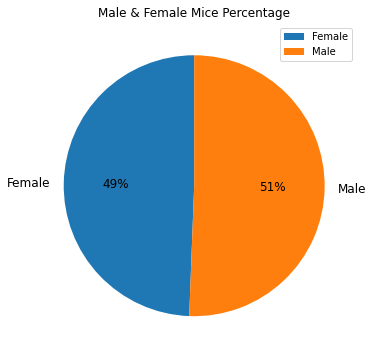

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121, aspect="equal")
gender_DataFrame.plot(kind="pie", ax=ax1, autopct='%2.0f%%', y = "Mouse ID"
          ,startangle=90, labels=gender_DataFrame["Sex"], legend = True, fontsize=12)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_TimePoints = pd.DataFrame(combine_Me.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_TimePoint'})
max_TimePoints
max_TimePoints.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_DataFrame = pd.merge(combine_Me, max_TimePoints, on='Mouse ID')
merged_DataFrame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_TimePoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_List = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    temp_df = merged_DataFrame.loc[merged_DataFrame['Drug Regimen'] == drug]
   #drugs_List = combine_Me[combine_Me['Drug Regimen'].isin(drugs)]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_DataFrame = temp_df.loc[temp_df['Timepoint'] == temp_df['max_TimePoint']]
    
    # add subset 
    values = final_volume_DataFrame['Tumor Volume (mm3)']
    drug_List.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerQuintile = quartiles[0.25]
    upperQuintile = quartiles[0.75]
    iqr = upperQuintile - lowerQuintile
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerQuintile - (1.5*iqr)
    upper_bound = upperQuintile + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
                                   
    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(final_volume_DataFrame['Tumor Volume (mm3)'] >= upper_bound) |
                        (final_volume_DataFrame['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


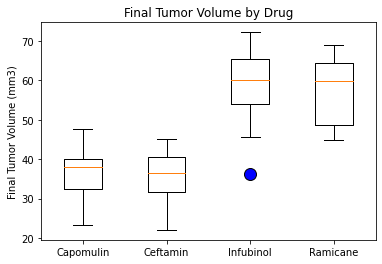

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markeredgecolor='black', markersize=12, markerfacecolor='b')

# Plot boxplot
plt.boxplot(drug_List, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])

plt.show()

## Line and Scatter Plots

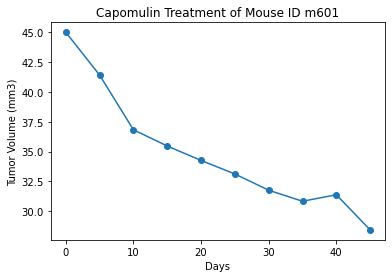

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = combine_Me.loc[combine_Me['Mouse ID'] == 'm601']

# Plot the chart with marker for clarity
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse ID m601")

# Display plot
plt.show()

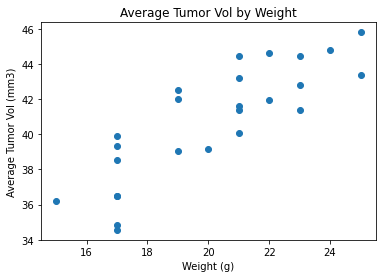

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_DataFrame = combine_Me.loc[combine_Me['Drug Regimen'] == 'Capomulin']

# Get the average tumor volume for mouse
avg_vol = pd.DataFrame(capomulin_DataFrame.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'average_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
average_vol = pd.merge(capomulin_DataFrame, avg_vol, on='Mouse ID')
last_avg_vol = average_vol[['Weight (g)', 'average_tumor_vol']].drop_duplicates()
last_avg_vol

x = last_avg_vol['Weight (g)']
y = last_avg_vol['average_tumor_vol']

plt.scatter(x, y)

plt.title('Average Tumor Vol by Weight')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")

plt.show()

## Correlation and Regression

Correlation between average tumor volume and weight on Capomulin is 0.84.


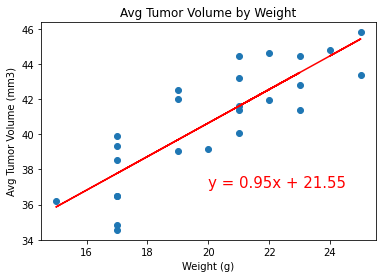

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_DataFrame = combine_Me.loc[combine_Me['Drug Regimen'] == 'Capomulin']

# Average tumor volume per mouse
avg_vol = pd.DataFrame(capomulin_DataFrame.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'average_tumor_vol'})

# Merge average tumor volume onto capomulin_DataFrame
average_vol = pd.merge(capomulin_DataFrame, avg_vol, on='Mouse ID')

# Drop duplicates
last_avg_vol = average_vol[['Weight (g)', 'average_tumor_vol']].drop_duplicates()
last_avg_vol

x = last_avg_vol['Weight (g)']
y = last_avg_vol['average_tumor_vol']


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""Correlation between average tumor volume and weight on Capomulin is {round(correlation[0],2)}.""")

# Calculate linear regression\n",
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title('Avg Tumor Volume by Weight')
plt.show()